# Predicting Co2 emissions based on highway mpg, city mpg and engine displacement

This notebook uses a historical dataset to build a linear regression model that predicts Co2 emissions based on highway mpg, city mpg and engine displacement

## 1. Collect the Data  
  
The process starts with importing the Panda’s and numpy packages.  
Next import the data into a Pandas data frame and preview the data frame.  
Use the <span style="color:green">.head() method </span>which provides a concise summary of the data frame. 

In [66]:
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
df = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/Module Portfolio - Data Science Professional Practice/Vehicles/vehicles_v1.xlsx")
df.head()

,citympg,displacement,highwaympg,co2emissions
0,14,4.1,19,555.44
1,14,5.0,20,555.44
2,18,5.7,26,484.76
3,21,4.3,31,424.17
4,14,4.1,19,555.44


## 2. Explore the Data  
### 2.1 Structure of the data
Next use the <span style="color:green"> .info() method </span> to determine the structure of the data frame.  
This allows us to preview the data frame and evaluate the structure of the data.  
There are <span style="color:blue">36,956 instances (rows or records) </span>and <span style="color:purple">4 features (columns or fields).</span>  
All the features are numeric and all are continuous variables.


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36956 entries, 0 to 36955
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   citympg       36956 non-null  int64  
 1   displacement  36956 non-null  float64
 2   highwaympg    36956 non-null  int64  
 3   co2emissions  36956 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.1 MB


### 2.2 Statistics of the features in the data frame
Next use the <span style="color:green">.desribe() method</span> to get summary statistics for the data. The statistics show the following:  
* Mean  
* Minimum  
* Maximum  
* Standard Deviation
* Percentile Values (25%, 50% and 75%)  
for the 4 features in the data frame.


In [68]:
df.describe()

,citympg,displacement,highwaympg,co2emissions
count,36956.000000,36956.000000,36956.000000,36956.000000
mean,17.530631,3.346244,23.767697,476.611910
std,4.472936,1.359974,5.719660,117.797861
min,6.000000,0.600000,9.000000,29.000000
25%,15.000000,2.200000,20.000000,400.000000
50%,17.000000,3.000000,24.000000,467.740000
75%,20.000000,4.300000,27.000000,555.440000
max,57.000000,8.400000,61.000000,1269.570000


### 2.3 Determine if there is a linear relationship between the independent variable (displacement) and the dependent variable (co2emissions).
Linear Regression Models assume that there exists a linear relationship between the <span style="color:blue"> predictors (independent variables) </span>
and the <span style="color:red"> response (dependent variable).</span>
  
The next step is the determine that the assumption holds true in the dataset.  
Scatterplot between the <span style="color:blue"> predictor (independent variable) – displacement </span>and the <span style="color:red"> response (dependent variable) co2emissions.</span>  

<AxesSubplot:xlabel='displacement', ylabel='co2emissions'>

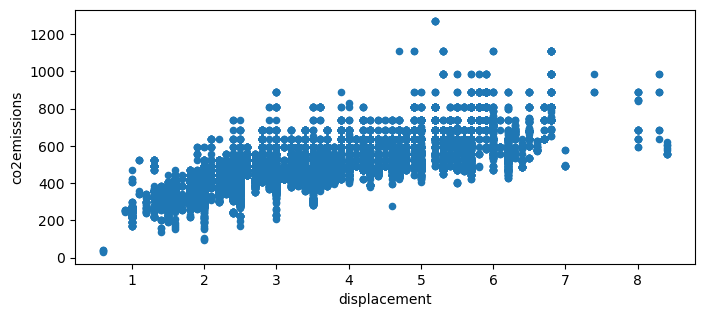

In [69]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'displacement', y = 'co2emissions',figsize = (8,3.3))

#### 2.3 Results and observations
Chart shows that there is a <span style="color:green"> positive linear relationship </span>  
between <span style="color:blue"> displacement </span> and <span style="color:red"> co2emissions.  </span>  
This means that as the <span style="color:green"> displacement increases </span>so co2emissions <span style="color:green"> increase </span>.

### 2.4 Is there a linear relationship between the independent variable (citympg) and the dependent variable (co2emissions).

Create a scatterplot between the <span style="color:blue"> predictor (independent variable) – citympg </span>and the <span style="color:red"> response (dependent variable) co2emissions.</span>  

<AxesSubplot:xlabel='citympg', ylabel='co2emissions'>

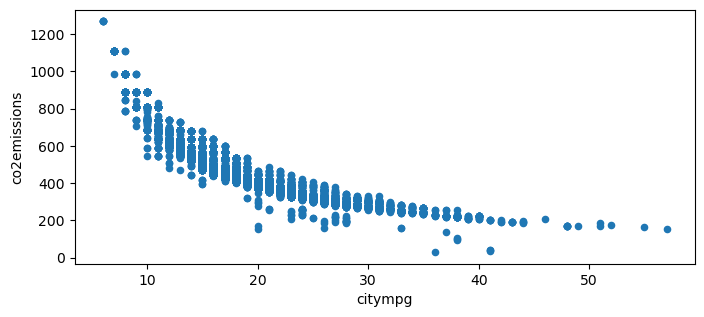

In [70]:
%matplotlib inline
df.plot(kind = 'scatter', x = 'citympg', y = 'co2emissions',figsize = (8,3.3))

#### 2.4 Results and observations

Chart shows that there is a <span style="color:red"> **negative non-linear relationship** </span> between <span style="color:blue"> citympg </span> and <span style="color:red"> co2emissions</span>  
This means that as the <span style="color:red"> citympg increases </span>the co2emissions <span style="color:red"> decreases </span>.

### 2.5 Is there a linear relationship between the independent variable (highwaympg) and the dependent variable (co2emissions).

Create a scatterplot between the <span style="color:blue"> predictor (independent variable) – highwaympg </span>and the <span style="color:red"> response (dependent variable) co2emissions.</span>


<AxesSubplot:xlabel='highwaympg', ylabel='co2emissions'>

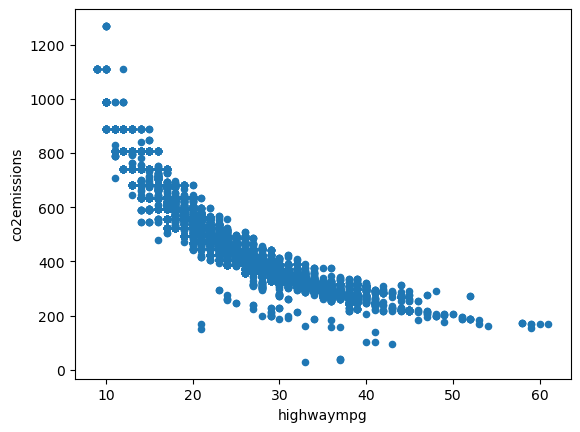

In [71]:
df.plot(kind = 'scatter', x = 'highwaympg', y = 'co2emissions')

#### 2.5 Results and observations
Chart shows that there is a <span style="color:red"> **negative non-linear relationship** </span> between <span style="color:blue"> highwaympg </span> and <span style="color:red"> co2emissions</span>  
This means that as the <span style="color:red"> highwaympg increases </span>the co2emissions <span style="color:red"> decreases </span>.


## 3. Prepare the Data

Before building the model, it is necessary to split the data into train and test datasets.  
#### Step 1
1. Start by creating a data frame <span style="color:blue">Y for the dependent variable</span> (this will only be one).  

In [72]:
response = 'co2emissions' # in the variable "response" put the name of the dependent variable
y = df[[response]] # create a single column data frame called y which willl contain the dependent variable
y

,co2emissions
0,555.44
1,555.44
2,484.76
3,424.17
4,555.44
...,...
36951,442.00
36952,466.00
36953,503.00
36954,661.00


#### Step 2
2. Next create another data frame <span style="color:red">X for the independent variables</span> (there can be one or more independent variable).  

In [73]:
predictors = list(df.columns) # lists the columns in the data frame stored in a variable called "predictors"
predictors.remove(response) # from predictors remove the response field
x = df[predictors] # put all the independent variables into a data frame called x
x

,citympg,displacement,highwaympg
0,14,4.1,19
1,14,5.0,20
2,18,5.7,26
3,21,4.3,31
4,14,4.1,19
...,...,...,...
36951,17,4.7,25
36952,16,6.2,25
36953,15,6.2,22
36954,12,6.5,16


#### Step 3
3. Import the train/test split function from SK Learn model selection sub package.  

In [74]:
from sklearn.model_selection import train_test_split

#### Step 4
4. Split the X and Y data frames into X_Train, X_Test and Y_Train, Y_Test.  

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

In [76]:
x_train

,citympg,displacement,highwaympg
23040,17,2.5,23
35811,15,3.5,21
24533,14,5.3,19
1175,18,2.6,21
17371,22,1.6,26
...,...,...,...
32399,23,2.0,31
17048,16,2.8,23
23924,15,3.9,22
34086,17,3.5,24


## 4. Train the Model
To build a Linear Regression Model in Python we need to import the linear regression class from the SK learn linear model sub package.


In [77]:
from sklearn.linear_model import LinearRegression


We can then use the linear regression function to build the model

<span style="color:green">*model = LinearRegression()*  </span>   
within the function call the fit method and pass to the fit method the x_train and y_train  
<span style="color:green">*model = LinearRegression().fit(x_train, y_train)*</span>



In [78]:
model = LinearRegression().fit(x_train, y_train) # note that the model(solution) is stored in the variable "model"

The objective of liner regression is to estimate:  
* Intercept (of the regression line)  
* Slope value (of the regression line)  
that best fits the data.

  
### Intercept (of the regression line)
The estimated intercept value for the model by referring to the intercept attributes of the model.  


<span style="color:green">*model.intercept_*</span>


In [79]:
model.intercept_

array([759.11443342])

The intercept value for this regression line is 759.11443342  

### Slope value (of the regression line) 
Next get the estimated slope values (coefficients) or the regression line by requesting the coef attributes of the model 

<span style="color:green">*model.coef_*</span>




In [80]:
model.coef_

array([[ -2.86341576,  23.00624715, -13.00082732]])

To make the coefficients easier to work with, convert the coefficients from a two-dimenionsal array to a one-dimensional array and round the values to two decimal places.

In [81]:
coefficients = np.round(model.coef_[0],2) 
coefficients

array([ -2.86,  23.01, -13.  ])

In [82]:
coef = pd.DataFrame({'Coefficients':coefficients}, index = x.columns)
coef

,Coefficients
citympg,-2.86
displacement,23.01
highwaympg,-13.00


<span style="color:red">**Note:** the model coeficients correspond to  the order in which the independent variables are listed in the training data</span>  
The model coefficient for:
* citympg = -2.86
* displacement = 23.01
* highwaympg = -13.00


The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

y = $\beta$0 + $\beta$1x +$\beta$2x +$\beta$3x

y = $\beta$0 + ($\beta$1 * citympg) + ($\beta$2 * displacement)  + ($\beta$3 * highwaympg)

With the linear regression equation, we can estimate what our model will predict co2 emissions given City MPG, engine dispalcement in cubic inches and highway MPG.

### Example One (midrange)
given a city MPG of $14$, engine displacement of $4.1$ cubic inches and highway MPG $19$, the model would predict:

$\text{ co2 emissions} \approx$ 759 + (-2.86 \times 14) + ( 23.01 \times 4.1) + (-13.00 \times 19)

$\text{ co2 emissions} \approx$ 759 - 40.04 + 94.34 - 247

$\text{ co2 emissions} \approx$ <span style="color:green">**566.30** (actual is 555.43 over reporting by 2%)</span> 

### Example Two (high mpg, small displacement - extreme low co2 emissions)
Vehicle with a city MPG of  36, engine displacement of 0.6 cubic inches and highway MPG 33, the model would predict:

 co2 emissions ≈ 759 + (-2.86 \times 36) + ( 23.01 \times 0.6) + (-13.00 \times 33)

 co2 emissions ≈ 759 - 102.96 + 13.81 - 429

 co2 emissions ≈ <span style="color:red">**240.85** (actual is 29 grossly over reporting by a significant percentage)</span> 

### Example Three (low mpg, large displacement - extreme high co2 emmissions)
Vehicle with a city MPG of 6, engine displacement of 5.2 cubic inches and highway MPG 10, the model would predict:

co2 emissions ≈ 759 + (-2.86 \times 6) + ( 23.01 \times 5.2) + (-13.00 \times 10)

co2 emissions ≈ 759 - 17.16 + 119.65 - 130

co2 emissions≈ <span style="color:red">**731.49**  (actual is 1269.57 under reporting by a significant percentage)</span> 

### Observation:
The scatterplots for Citympg vs co2 emissions and highwaympg vs co2 emissions both demonstrate that there is NOT a liner relationship between fuel consumption measured in miles per galllon and co2 emissions.

The examples at the two extremes demonstrate the problem with the model.

## 5. Evaluate the Model
### Using the  R squared method to evaluate performance
The next step in the process is to evaluate the performance of the model.  
One way to evaluate the performance o a linear regression model is by calculating the <span style="color:blue"> coefficient of determination </span> or <span style="color:blue"> R squared</span>.  
  
The closer this metric is to 1 the better the model is.
  
To get the R squared or the model use the .score() method and pass to it x_test and y_test 
  
<span style="color:green">*model.score(x_test,y_test)*</span>  
  

In [83]:
model.score(x_test,y_test)

0.9028020413862885

The R squared value reflects the degree of precision of the prediction.  
  
In this example the model can predict co2 emissions given engine displacemnt, city MPG and Highway MPG with an accuracy of 90.2% of the variability in the response (dependent) variable.   
  
The 3 examples show that this is NOT a reasonable model becuase at the extreme the reporting is incorrect. 
The model is incorrect becuase the relationship between cityMPG (highway MPG) and displacement is NOT linear

### Using the Mean Absolute Error test to evaluate model performance 
Another method of performance evaluation for linear regression is to evaluate how accurate the model is. This means comparing the predicted values against the actual values (using the test data set).

#### Step 1: 
Get the models predicted response values for the test data. We get the model predictions by calling the predict method of the model and pass it the method x_test

<span style="color:green">*y_predictions = model.predict(x_test)*</span>

In [84]:
y_predictions = model.predict(x_test)
y_predictions

array([[571.63253934],
       [634.87498873],
       [612.80365428],
       ...,
       [612.10887152],
       [622.80907412],
       [494.80261808]])


#### Step 2:
Import the *Mean Absolute Error* function from the SK learn.metrics subpackage and calculate the mean absolute error between the actual response values (from test data) and the predicted response values.

<span style="color:green">*mean_absolute_error(y_test, y_ predictions)*</span>



In [85]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predictions)

23.692365697529198

## Conclusion
The mean absolute error implies that the predictions for this model to have an average variance of between +-23.7 in co2 emissions and a model test score of 90%. 
  
<span style="color:red">**HOWEVER** despite the good indicators this model is **fundamentally flawed**.</span>

At the extremes this linear model does not work because that there is <span style="color:red">**NOT** a liner relationship between fuel consumption measured in miles per gallon and Co2 emissions.</span> The model must be built using a different technique or be adjusted to account for the curvature in the relationship between fuel consumption and Co2 emissions.
